Exploration du Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [2]:
filePath = "advertising.csv"
df = pd.read_csv(filePath)

In [3]:
df.shape

(200, 4)

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

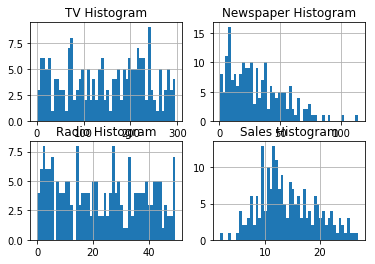

In [7]:
plt.subplot(2, 2, 1)
plt.title('TV Histogram')
df['TV'].hist(bins = 50)
plt.subplot(2, 2, 2)
plt.title('Newspaper Histogram')
df['Newspaper'].hist(bins = 50)
plt.subplot(2, 2, 3)
plt.title('Radio Histogram')
df['Radio'].hist(bins = 50)
plt.subplot(2, 2, 4)
plt.title('Sales Histogram')
df['Sales'].hist(bins = 50)
plt.show()

On peut remarquer que les variables *Radio* et *TV* se distribent d'une façon plutot uniforme, tandis que la distribution des variable *Newspaper* et *Sales* semblent suivre une distribution gaussienne, assez symetrique pour la *Sales* mais assez "Skewed" pour la variable *Newspaper*.

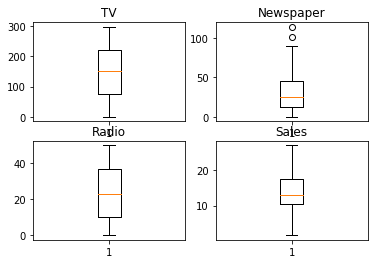

In [8]:
plt.subplot(2, 2, 1)
plt.title("TV")
plt.boxplot(df['TV'])
plt.subplot(2, 2, 2)
plt.title("Newspaper")
plt.boxplot(df['Newspaper'])
plt.subplot(2, 2, 3)
plt.title("Radio")
plt.boxplot(df['Radio'])
plt.subplot(2, 2, 4)
plt.title("Sales")
plt.boxplot(df['Sales'])
plt.show()

On peut voir que la variable *Newspaper* contient deux outliers.
Il n'y a pas de valeurs manquantes dans le dataset.

Variable Correlation

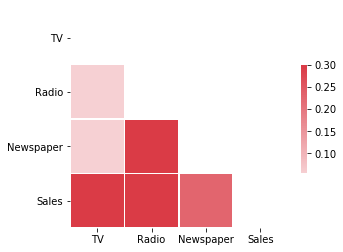

In [34]:
import seaborn as sns
import numpy as np
correlations = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 4))
                     
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


On peut voir que les trois variables explicatives sont correlees a la variable *Sales*. *Newspaper* etant la moins correllee. On remarque aussi que *Radio* est tres correllee a *Newspaper*, compte tenu du fait qu'il vehiculent plus ou moins le meme type de contenu.

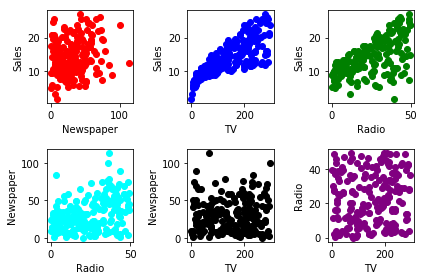

In [9]:
plt.subplot(2, 3, 1)
plt.plot(df['Newspaper'], df['Sales'], 'o', color='red');
plt.xlabel('Newspaper')
plt.ylabel('Sales')

plt.subplot(2, 3, 2)
plt.plot(df['TV'], df['Sales'], 'o', color='blue');
plt.xlabel('TV')
plt.ylabel('Sales')

plt.subplot(2, 3, 3)
plt.plot(df['Radio'], df['Sales'], 'o', color='green');
plt.xlabel('Radio')
plt.ylabel('Sales')

plt.subplot(2, 3, 4)
plt.plot(df['Radio'], df['Newspaper'], 'o', color='cyan');
plt.xlabel('Radio')
plt.ylabel('Newspaper')

plt.subplot(2, 3, 5)
plt.plot(df['TV'], df['Newspaper'], 'o', color='black');
plt.xlabel('TV')
plt.ylabel('Newspaper')

plt.subplot(2, 3, 6)
plt.plot(df['TV'], df['Radio'], 'o', color='purple');
plt.xlabel('TV')
plt.ylabel('Radio')

plt.tight_layout()
plt.show()


On observe qu'il y a une corrélation entre la variables **Sales** et les deux variables **Radio** et **TV**
On observe aussi qu'il y a une relation presque logarithmique entre la variable **Sales** et **TV**. Une certaine variation de cette variable peut etre exploitee afin d'arriver a un meilleur resultat.

Univariate Models

In [82]:
import statsmodels.formula.api as smf
lmTV = smf.ols(formula='Sales ~ TV ', data=df).fit()
lmRadio = smf.ols(formula='Sales ~ Radio ', data=df).fit()
lmNewspaper = smf.ols(formula='Sales ~ Newspaper ', data=df).fit()

In [89]:
print(lmTV.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           1.47e-42
Time:                        15:32:09   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

In [90]:
print(lmRadio.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           4.35e-19
Time:                        15:32:14   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.0

In [91]:
print(lmNewspaper.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Wed, 26 Sep 2018   Prob (F-statistic):            0.00115
Time:                        15:32:16   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.0

- D'après les valeurs de R^2, de la p-value, des coefficients et de la MSE, on remarque que le meilleur modèle est celui de la variable **Sales** en fonction de la variable **TV**. Alors **TV** est le meilleur candidat pour predire Sales que Radio parce que le publicité audiovisuelle vehiculent le message de maniere plus puissante vu le grand bandwith qu'elle utilise. Il n'y a pas de relation significative entre la variable **Newspaper** et la variable **Sales**. 
- Afin de juger l'importance relative de chaque variable, il faudrait normaliser ce dernieres, cela fait les coefficients de regression donneront une bonne estimation.
- L'intercept represente le nombre d'unite vendues si le budget TV etait nul, qui est de 7 a 95% de certitude.

Multivariate Model

In [92]:
lmMultiVariables = smf.ols(formula='Sales ~ Radio + TV + Newspaper ', data=df).fit()
print(lmMultiVariables.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           1.58e-96
Time:                        15:36:14   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

- La première remarque à propos de ce modèle, est que la pvalue de la variable 'Newspaper' est très grande (0.86) avec un coefficient qui est très petit, alors ce n'est pas la peine de laisser cette variable dans le modèle. On observe aussi que la valeur de R-squared est très élevée (0.897), ce montre que notre modèle performe bien
- Si on augmente de 50 les sommes allouées au média TV, les ventes augmentent de 0.229
- Le coefficient pour Newspaper est presque nul, légérement négatif, dans le modèle complet tandis qu'il est positif lorsque pris en compte individuellement parseque dans le premier modèle, on n'avait pas de coefficients significatifs à part de celui  de l'intercept qui affectaient les résulats. Donc je pense que le fait le coefficient est négatif est juste par hasard, c'est à dire, qu'un simple de changement dans la valeurs de la base de données ou des coefficient des autre variable peut résulter en un coefficient positif

In [93]:
lmMultiVariables = smf.ols(formula='Sales ~ Radio + TV', data=df).fit()
print(lmMultiVariables.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           4.83e-98
Time:                        15:40:54   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0

On remarque que les valeurs de R-squared, Adjusted R-squared et MSE n'ont pas changé après avoir enlevé la variable 'Newspaper', mais par contre le modèle est plus simple à manipuler. Il est naturel que le R-squared diminue, vu le fait qu'il est correlle avec le nombre de variable, l'adjusted R-squared remedie cela en enlevant ce biais. Ce n'est pas le cas ici puisque la variable Newspaper est non-significative.

In [ ]:
Multiplicative Model

In [94]:
lmMultiVariables = smf.ols(formula='Sales ~ Radio + TV + TV*Radio', data=df).fit()
print(lmMultiVariables.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Wed, 26 Sep 2018   Prob (F-statistic):          6.68e-146
Time:                        15:53:44   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.0

On remarque que l'ajout de la  variable multiplicative **TV * Radio** a produit un modèle plus performant. La R-squared avoisinne les 97% !